In [1]:
import pydsd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pydsd.plot

import sys

import glob
from pandas import DataFrame

In [2]:
path = '/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/'
files = [f for f in glob.glob(path + "**/*corvdisM1.b1.201811*", recursive=True)]
files.sort()

statistics = {'time': [],'Adr': [],'Ai': [], 'Kdp': [], 'rain_rate': [], 'Dmax': [], 'Dm': []}

for file in files:
    dsd = pydsd.aux_readers.ARM_Vdis_Reader.read_arm_vdis_b1(file)
    dsd.calculate_dsd_parameterization()
    dsd.calculate_radar_parameters()
    statistics['time'].append(dsd.fields['Adr']['data'])
    statistics['Adr'].append(dsd.fields['Adr']['data'])
    statistics['Ai'].append(dsd.fields['Ai']['data'])
    statistics['Kdp'].append(dsd.fields['Kdp']['data'])
    statistics['rain_rate'].append(dsd.fields['rain_rate']['data'])
    statistics['Dmax'].append(dsd.fields['Dmax']['data'])
    statistics['Dm'].append(dsd.fields['Dm']['data'])
    print(file)


/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:348: RuntimeWarning: invalid value encountered in true_divide
  self._calc_mth_moment(4), self._calc_mth_moment(3)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pytmatrix/psd.py:174: RuntimeWarning: invalid value encountered in double_scalars
  self.nf = Nw * 6.0/3.67**4 * (3.67+mu)**(mu+4)/gamma(mu+4)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pytmatrix/psd.py:178: RuntimeWarning: overflow encountered in exp
  psd = self.nf * np.exp(self.mu*np.log(d)-(3.67+self.mu)*d)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:466: RuntimeWarning: invalid value encountered in true_divide
  Lambda = np.power(np.divide(num, den), (1 / (moment_2 - moment_1)))
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:233: RuntimeWarnin

/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181101.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181102.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181103.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181104.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181105.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181106.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181107.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181108.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181109.000000.cdf
/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.

In [18]:
results = {}
for k, v in statistics.items():
    results[k] = np.concatenate(statistics[k])

In [19]:
results

{'Adr': masked_array(data=[-1.80058131e-08,  3.11747472e-05,  2.24298585e-04, ...,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
              mask=False,
        fill_value=1e+20),
 'Ai': masked_array(data=[2.63941141e-06, 9.23897114e-04, 4.46518855e-03, ...,
                    0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
              mask=False,
        fill_value=1e+20),
 'Kdp': masked_array(data=[-3.97858849e-06,  5.80038179e-03,  3.76308739e-02, ...,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
              mask=False,
        fill_value=1e+20),
 'rain_rate': masked_array(data=[0.18146813, 1.3463764 , 2.1456633 , ..., 0.        ,
                    0.        , 0.        ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'Dmax': masked_array(data=[0.1       , 1.5       , 1.89999998, ..., 0.        ,
                    0.        , 0.        ],
              mask=False,
        fill_value=

In [20]:
df = DataFrame(results, 
               columns= ['Adr','Ai', 'Kdp', 'rain_rate', 'Dmax', 'Dm'])
export_excel = df.to_excel (r'./disdrometer.xlsx', index = None, header=True)

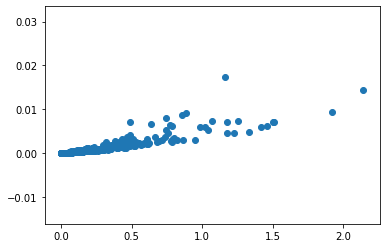

In [5]:
plt.scatter(statistics['Kdp'], statistics['Adr'])

In [29]:
len(statistics['Adr'])

2

In [31]:
statistics['Adr']

[[[[[],
    masked_array(data=[-3.31711362e-08,  0.00000000e+00,  0.00000000e+00, ...,
                        0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                 mask=False,
           fill_value=1e+20)],
   masked_array(data=[-3.31711362e-08,  0.00000000e+00,  0.00000000e+00, ...,
                       0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                mask=False,
          fill_value=1e+20)],
  masked_array(data=[-3.31711362e-08,  0.00000000e+00,  0.00000000e+00, ...,
                      0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
               mask=False,
         fill_value=1e+20)],
 masked_array(data=[-3.31711362e-08,  0.00000000e+00,  0.00000000e+00, ...,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
              mask=False,
        fill_value=1e+20)]

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:348: RuntimeWarning: invalid value encountered in true_divide
  self._calc_mth_moment(4), self._calc_mth_moment(3)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pytmatrix/psd.py:174: RuntimeWarning: invalid value encountered in double_scalars
  self.nf = Nw * 6.0/3.67**4 * (3.67+mu)**(mu+4)/gamma(mu+4)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pytmatrix/psd.py:178: RuntimeWarning: overflow encountered in exp
  psd = self.nf * np.exp(self.mu*np.log(d)-(3.67+self.mu)*d)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:466: RuntimeWarning: invalid value encountered in true_divide
  Lambda = np.power(np.divide(num, den), (1 / (moment_2 - moment_1)))


(<matplotlib.axes._subplots.AxesSubplot at 0x7efc9bfd6550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc9bfd6550>)

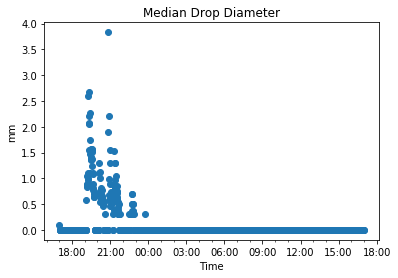

In [3]:
filename = '/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/disdromter/217667/corvdisM1.b1.20181214.000000.cdf'

dsd = pydsd.aux_readers.ARM_Vdis_Reader.read_arm_vdis_b1(filename)

dsd.calculate_dsd_parameterization()


pydsd.plot.plot_ts(dsd, 'D0', x_min_tick_format='hour')

(<Figure size 576x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc9b7546d0>)

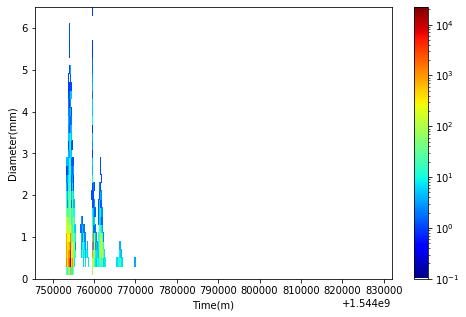

In [4]:
fig = plt.figure(figsize=(8,5))
pydsd.plot.plot_dsd(dsd, fig=fig)

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pydsd/DropSizeDistribution.py:233: RuntimeWarning: divide by zero encountered in log10
  self.fields["Zh"]["data"][t] = 10 * np.log10(radar.refl(self.scatterer))
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pytmatrix/radar.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return radar_xsect(scatterer, True)/radar_xsect(scatterer, False)


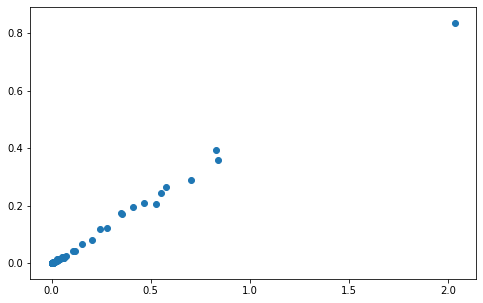

In [5]:
dsd.calculate_radar_parameters()

fig2 = plt.figure(figsize=(8,5))
plt.scatter(dsd.fields['Kdp']['data'], dsd.fields['Ai']['data'])